<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DLthon/DLthon_CIFAR10_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

전체 데이터셋 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
Min pixel value: 0
Max pixel value: 255
(40960000, 3)


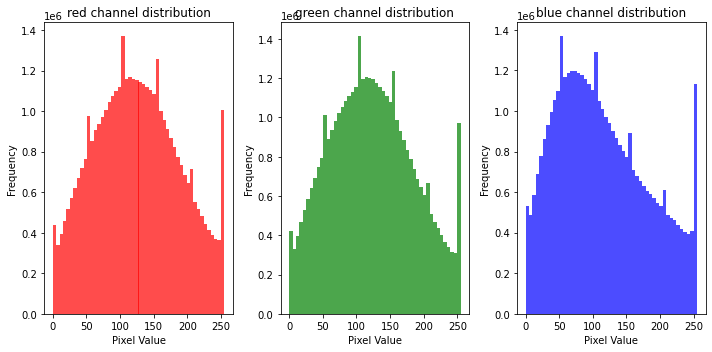

In [ ]:
# CIFAR10 EDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# CIFAR-10 데이터셋을 로드
from keras.datasets import cifar10

# 데이터를 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
train_images, val_images, train_labels, val_labels = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 데이터셋 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(train_images.shape, train_labels.shape))
print("검증 데이터: {} 레이블: {}".format(val_images.shape, val_labels.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

# 픽셀 값의 범위 확인
print(f"Min pixel value: {train_images.min()}")
print(f"Max pixel value: {train_images.max()}")

# 모든 이미지의 픽셀 값을 하나의 리스트로 연결
# 배열은 모든 이미지의 모든 픽셀의 RGB 값을 순차적으로 나열한 것입니다.
# 이 배열을 사용하여 RGB 채널별 픽셀 값의 분포를 분석할 수 있습니다.
all_pixels = train_images.reshape(-1, 3) # 각 행은 RGB 값

print(all_pixels.shape)

# RGB 채널 별 히스토그램
# 이미지의 픽셀 값 분포를 확인하고, 각 RGB 채널의 픽셀 값 분포를 히스토그램으로 시각화합니다.
# 이를 통해 데이터의 특성을 더 잘 이해할 수 있습니다.
plt.figure(figsize=(10, 5))
colors = ["red", "green", "blue"]
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    plt.hist(all_pixels[:, i], bins=50, color=color, alpha=0.7)
    plt.title(f"{color} channel distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

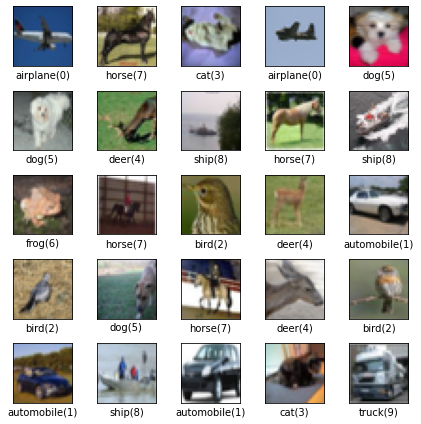

In [ ]:
# CIFAR-10 데이터 샘플 시각화 코드 출력
# 클래스 이름 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(images, labels):
    plt.figure(figsize=(6, 6))

    # 랜덤하게 인덱스 25개 선택
    random_indices = np.random.choice(images.shape[0], 25, replace=False)

    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(f"{class_names[labels[i][0]]}({labels[i][0]})")
    plt.tight_layout()
    plt.show()

# 랜덤하게 25개의 이미지와 레이블을 표시
plot_sample_images(train_images, train_labels)

In [ ]:
# 클래스 별 이미지 수 확인
unique, counts = np.unique(train_labels, return_counts=True)
class_counts = dict(zip(unique, counts))

for label, count in class_counts.items():
    print(f"Class {class_names[label]}: {count} images")


Class airplane: 3964 images
Class automobile: 4029 images
Class bird: 4021 images
Class cat: 3983 images
Class deer: 3954 images
Class dog: 4007 images
Class frog: 4030 images
Class horse: 4050 images
Class ship: 3978 images
Class truck: 3984 images


In [ ]:
# 2. 데이터 전처리
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# 3. 클래스 레이블을 원핫인코딩으로 변환
from tensorflow.keras.utils import to_categorical

num_classes = 10  # CIFAR-10은 10개의 클래스로 구성됨
train_labels_one_hot = to_categorical(train_labels, num_classes)
val_labels_one_hot = to_categorical(val_labels, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(train_labels_one_hot)
print(val_labels_one_hot)
print(y_test_one_hot)

#원핫인코딩시켰기 때문에 loss를 categorical_crossentropy로 바꿔주어야 함
# not sparse_categorical_crossentropy

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# 4. 이미지 데이터 증강
# ImageDataGenerator를 사용하여 이미지 데이터 증강을 적용하면 모델의 과적합을 줄이고 일반화 성능을 향상시킬 수 있습니다.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,       # 이미지 회전 범위 (도)
    width_shift_range=0.1,  # 수평 방향으로 이동 범위 (전체 너비의 비율)
    height_shift_range=0.1, # 수직 방향으로 이동 범위 (전체 높이의 비율)
    shear_range=0.1,        # 전단 변환 범위
    zoom_range=0.1,         # 확대/축소 범위
    horizontal_flip=True,   # 수평 방향으로 뒤집기
    fill_mode='nearest'     # 빈 공간을 어떻게 채울지 ('nearest', 'constant', 'reflect', 'wrap' 중 선택)
)
datagen.fit(train_images)

In [ ]:
# 로그 디렉터리 설정, 콜백함수 정의
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, LearningRateScheduler
import os

log_dir = "./logs"
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.95  # decrease the learning rate after 10 epochs

tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint = ModelCheckpoint('cifar10_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

In [ ]:
# 모델 구성
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=4, padding='same', strides=1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=4, padding='same', strides=1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        65600     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

In [ ]:
# 학습, 원핫인코딩된 레이블로 레이블 바꿔주기
callbacks_list = [checkpoint, early_stopping, lr_scheduler, tensorboard]

history = model.fit(datagen.flow(train_images, train_labels_one_hot, batch_size=32),
                    epochs=50,
                    validation_data=(val_images, val_labels_one_hot),
                    shuffle=True,
                    callbacks=callbacks_list)

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
1250/1250 [==============================] - 31s 18ms/step - loss: 9.4285 - accuracy: 0.3674 - val_loss: 7.3222 - val_accuracy: 0.4869

Epoch 00001: val_accuracy improved from -inf to 0.48690, saving model to cifar10_model.h5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
1250/1250 [==============================] - 22s 18ms/step - loss: 6.1361 - accuracy: 0.4753 - val_loss: 4.9535 - val_accuracy: 0.5389

Epoch 00002: val_accuracy improved from 0.48690 to 0.53890, saving model to cifar10_model.h5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.009999999776482582.
1250/1250 [==============================] - 23s 18ms/step - loss: 4.1967 - accuracy: 0.5330 - val_loss: 3.4368 - val_accuracy: 0.5917

Epoch 00003: val_accuracy improved from 0.53890 to 0.59170, saving model to cifar10_model.h5
Epoch 4/50

Epoch 00004: LearningR

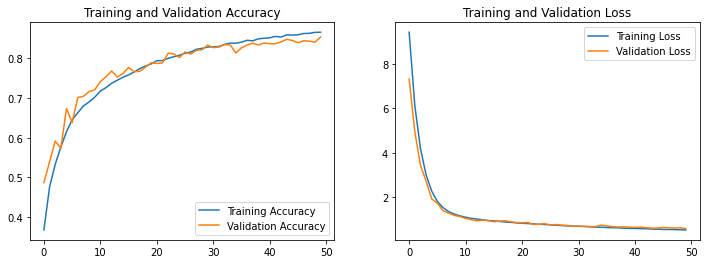

In [ ]:
# 학습 및 검증 정확도와 손실을 그래프로 표시
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# 모델 학습 이후에 이 함수를 호출
plot_history(history)

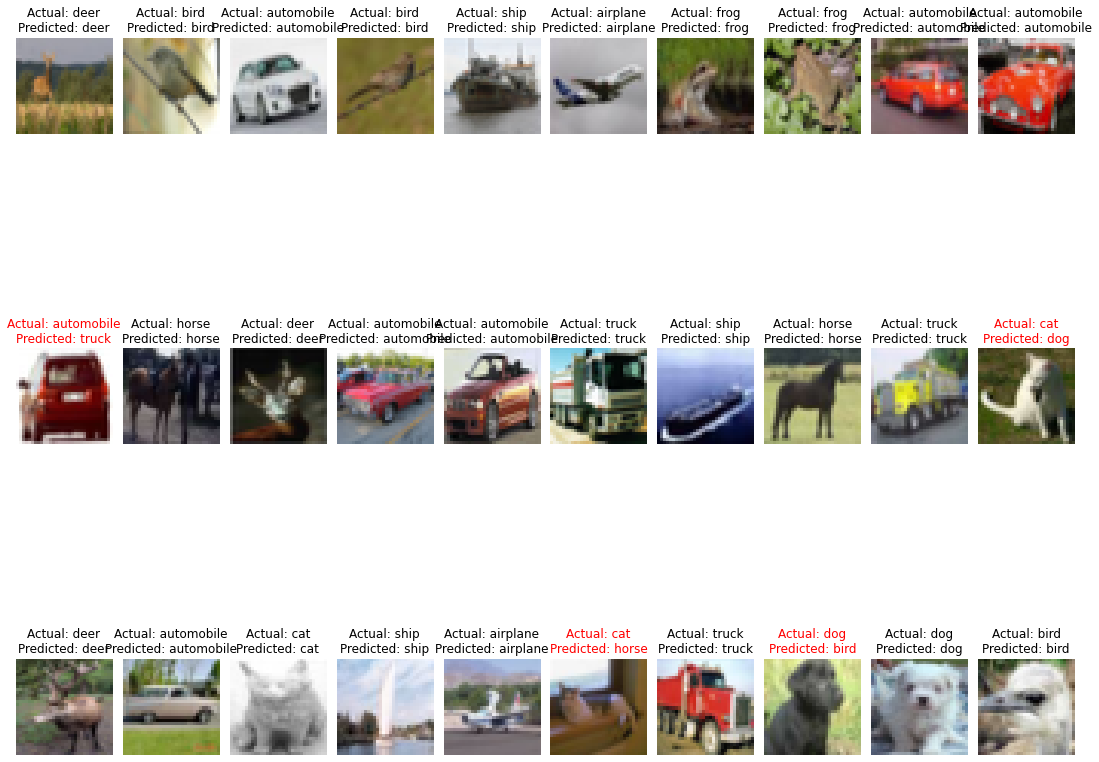

In [ ]:
# 모델을 사용하여 예측한 클래스와 실제 클래스를 비교하는 이미지 시각화
def plot_predictions(images, labels, predictions, class_names, num=30, images_per_row=10):
    num_rows = (num + images_per_row - 1) // images_per_row
    plt.figure(figsize=(15, 5 * num_rows))
    for i in range(num):
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(images[i])

        actual_class = class_names[labels[i][0]]
        predicted_class = class_names[np.argmax(predictions[i])]

        title = f"Actual: {actual_class}\nPredicted: {predicted_class}"
        if actual_class != predicted_class:
            title = f"Actual: {actual_class}\nPredicted: {predicted_class}"
            plt.title(title, color='red')  # 예측이 틀린 경우 빨간색 글자로 표시
        else:
            plt.title(title)

        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 모델을 사용하여 예측
predictions = model.predict(val_images)

# 첫 30개 이미지에 대한 실제 클래스와 예측 클래스 시각화
plot_predictions(val_images, val_labels, predictions, class_names, num=30, images_per_row=10)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 2s 6ms/step - loss: 0.5866 - accuracy: 0.8493


[0.5866146087646484, 0.8493000268936157]